# Group 8

## Product Review Scrapping & Analysing Tool for Flipkart (Web Scrapping, NLP & Classification)


#### Project Flow 

- Get the Product Name from user. Extract all the reviews available on flipkart.
- Apply NLP tasks on the obtained dataset (Bag of Words Model)
- Apply Classification models to predict whether a review is positve or negative.
- Again apply NLP tasks to obtain the Major highlights/Pros & Major Drawbacks/Cons of the product.
- Create World Cloud for Positive Reviews & Negative Reviews

### Importing Libraries

In [1]:
from flask import request
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm

### Taking the Input from User (Product Name)

In [2]:
input_by_user = input("Enter the Product name : ")

Enter the Product name : iphone 7


### Search String generated for the Product Name given

In [3]:
searchString = input_by_user.replace(" ","")
flipkart_url = "https://www.flipkart.com/search?q=" + searchString

In [4]:
flipkart_page = requests.get(flipkart_url)
flipkart_page_html = bs(flipkart_page.text, "html.parser")

In [5]:
products = flipkart_page_html.findAll("div", {"class": "_1AtVbE col-12-12"})
product = products[3]
flipkart_first_product_url = product.div.div.div.a['href']

### URL generation for the Product Name

In [6]:
flipkart_product_page = requests.get('https://www.flipkart.com'+flipkart_first_product_url)
flipkart_product_page_html = bs(flipkart_product_page.text, "html.parser")
all_review_link = flipkart_product_page_html.find("div", {"class": "_3UAT2v _16PBlm"})
product_reviewpage_link = 'https://www.flipkart.com' + all_review_link.find_parent().attrs['href']
product_reviewpage_link

'https://www.flipkart.com/apple-iphone-7-rose-gold-32-gb/product-reviews/itmen6dapsvxanrk?pid=MOBEMK62JSRHU85T&lid=LSTMOBEMK62JSRHU85TIU9DKW&marketplace=FLIPKART'

### Custom function for Scrapping the reviews from Flipkart

In [7]:
def review_grabber(review_html_page , data , searchString):
    bigbox = review_html_page.find_all('div',{'class':"_1AtVbE col-12-12"})
    del bigbox[:3]
    #del bigbox[-1]
    for box in bigbox:
        try:
            name = box.div.div.find_all('p', {'class': '_2sc7ZR _2V5EHH'})[0].text
        except:
            name = 'No Name'
        try:
            rating = box.div.div.div.div.div.text
        except:
            rating = 'No Rating'

        try:
            commentHead = box.div.div.div.div.p.text
        except:
            commentHead = 'No Comment Heading'

        try:
            comtag = box.div.div.find_all('div', {'class': ''})
            custComment = comtag[0].div.text
        except:
            custComment = 'No Customer Comment'

        try:
            date = box.div.div.find_all('p', {'class': '_2sc7ZR'})[1].text
        except:
            date = "No Date"

        mydict = {"Product": searchString,
                  "Name": name,
                  "Rating": rating,
                  "CommentHead": commentHead,
                  "Comment": custComment,
                  "Date":date}
        data.append(mydict)

In [8]:
product_name = product_reviewpage_link.split("/")[3]
product_name

'apple-iphone-7-rose-gold-32-gb'

In [9]:
next_link = product_reviewpage_link
response = requests.get(next_link)
review_page_html = bs(response.content,"html.parser")
count_pages = review_page_html.findAll("div",attrs={"class","_2MImiq _1Qnn1K"})
try:
    total_pages = int(count_pages[0].span.text.split(" ")[-1])
except:
    total_pages = 1000
total_pages

923

In [10]:
page = 100

In [11]:
data = []
for i in tqdm(range(1,min(total_pages,page))):
    next_link = product_reviewpage_link + "&page=" +str(i)
    response = requests.get(next_link)
    review_page_html = bs(response.content,"html.parser")
    review_grabber(review_page_html, data , product_name)


100%|██████████| 99/99 [03:30<00:00,  2.13s/it]


### Reviews scrapped in Pandas Dataframe

In [12]:
df = pd.DataFrame(data)
df.head(20)

,Product,Name,Rating,CommentHead,Comment,Date
0,apple-iphone-7-rose-gold-32-gb,No Name,4.5★,No Comment Heading,No Customer Comment,No Date
1,apple-iphone-7-rose-gold-32-gb,Hemanta Sa,5,Worth every penny,Thank u Flipkart for your fast delivery. It is...,"Sep, 2019"
2,apple-iphone-7-rose-gold-32-gb,Anish Singh,5,Simply awesome,My first iPhone ❤️Got 3 days before expected d...,"Jul, 2020"
3,apple-iphone-7-rose-gold-32-gb,suresh b,4,Pretty good,excellent phone camera is very nice and the st...,"Nov, 2018"
4,apple-iphone-7-rose-gold-32-gb,Gautam Choudhary,5,Worth every penny,Awesome Smartphone for iPhone lover..I got it ...,"Oct, 2019"
5,apple-iphone-7-rose-gold-32-gb,Flipkart Customer,4,Pretty good,I have been using the earlier versions of iPho...,"Nov, 2019"
6,apple-iphone-7-rose-gold-32-gb,Mayank Chaube,5,Perfect product!,IMPORTANT NOTICEIf you buy some apple device o...,"Oct, 2018"
7,apple-iphone-7-rose-gold-32-gb,Shariq Ahmad Beigh,5,Awesome,"Well, what can I say... iPhone is awesome as e...","Oct, 2016"
8,apple-iphone-7-rose-gold-32-gb,chandan kumar panda,5,Great product,amazing phone my first i phone 7 it is really...,"Nov, 2019"
9,apple-iphone-7-rose-gold-32-gb,Preeti Kureel,4,Pretty good,"good I phone 7 rose gold and best camera,best ...","Nov, 2018"


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df = df[df["Date"] != "No Date"]
df.reset_index(inplace=True)
df = df.drop(columns="index")
df

,Product,Name,Rating,CommentHead,Comment,Date
0,apple-iphone-7-rose-gold-32-gb,Hemanta Sa,5,Worth every penny,Thank u Flipkart for your fast delivery. It is...,"Sep, 2019"
1,apple-iphone-7-rose-gold-32-gb,Anish Singh,5,Simply awesome,My first iPhone ❤️Got 3 days before expected d...,"Jul, 2020"
2,apple-iphone-7-rose-gold-32-gb,suresh b,4,Pretty good,excellent phone camera is very nice and the st...,"Nov, 2018"
3,apple-iphone-7-rose-gold-32-gb,Gautam Choudhary,5,Worth every penny,Awesome Smartphone for iPhone lover..I got it ...,"Oct, 2019"
4,apple-iphone-7-rose-gold-32-gb,Flipkart Customer,4,Pretty good,I have been using the earlier versions of iPho...,"Nov, 2019"
...,...,...,...,...,...,...
962,apple-iphone-7-rose-gold-32-gb,Hemanth Karri,5,Terrific,My first phone is awesome love ❤😘it cemara is ...,"Feb, 2020"
963,apple-iphone-7-rose-gold-32-gb,Shubham Sardana,5,Terrific,Best phone ever i purchased in year end sale t...,"Dec, 2019"
964,apple-iphone-7-rose-gold-32-gb,Nitesh sharma,5,Night vizon and day,super Q....... ***** thanks apple 13.1.3 update,"Oct, 2019"
965,apple-iphone-7-rose-gold-32-gb,Flipkart Customer,5,Mind-blowing purchase,Amazing ❤️😌,"Oct, 2019"


### Exporting the Dataset

In [15]:
df.to_excel(f"{product_name}.xlsx",index=False)

- Till now we have scrapped all the reviews available for the product on Flikart Website. 
- Now we will be using those reviews as our dataset, apply Bag of Worlds model to generate a Vector of most commonly used words.
- Further ahead we will apply classification algorithms to Predict whether a review is Positive or Negative.

### Importing Dependencies

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Scrapped Reviews

In [17]:
data = pd.read_csv("Reviews.csv")
data

,Product,Name,Rating,CommentHead,Comment,Date
0,apple-iphone-12-white-128-gb,Flipkart Customer,5,Terrific,Wow superb camera phone Very smooth speed and ...,2 months ago
1,apple-iphone-12-white-128-gb,Anurag Lad,5,Perfect product!,The brand is very trustworthy and i got genuin...,4 months ago
2,apple-iphone-12-white-128-gb,Vishal Gandhi,5,Terrific purchase,Awesome phone … value for money.. Happy with b...,4 months ago
3,apple-iphone-12-white-128-gb,Ishu Kumar,5,Mind-blowing purchase,"Guys ,this is just Beast at Every Aspect of Co...",6 months ago
4,apple-iphone-12-white-128-gb,Suddha Ram boro,5,Awesome,Thanks flipkart i trust you got my device perf...,4 months ago
...,...,...,...,...,...,...
5818,apple-iphone-12-white-128-gb,Swaran Singh,5,Excellent,Received as desired.,4 months ago
5819,apple-iphone-12-white-128-gb,Pradhuman Arya,5,Mind-blowing purchase,Camera Quality,4 months ago
5820,apple-iphone-12-white-128-gb,Gautam Hegde,4,Wonderful,Just buy it !,4 months ago
5821,apple-iphone-12-white-128-gb,Pinak Soni,3,Decent product,"Review after usage of 10 days,Battery disappoi...",4 months ago


### Cleaning the Reviews (Vectorization, Lemmaniztion)

In [18]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english')
corpus = []

for i in range(0,len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Comment'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_words = stopwords.words('english')
  all_words.remove('not')
  review = [ snow_stemmer.stem(i) for i in review if not i in set(all_words) ]
  review = ' '.join(review)
  corpus.append(review)

print(corpus)
len(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['wow superb camera phone smooth speed lag iphon king alway beauti product', 'brand trustworthi got genuin pice low cost order green one trust colour amaz colour specif green purpl nice look thank flipkart', 'awesom phone valu money happi batteri life awesom camera featur look imag snap use phone easi use fear get scratch back glass use cover help', 'guy beast everi aspect configur full pack want like best camera best display best batteri whole day use everyon know process speed', 'thank flipkart trust got devic perfect love best phone segment', 'excel product worth everi penni write review use day earlier use iphon plus iphon faster anyth els excel pictur qualiti love', 'first iphon ever bought earn money part time job colleg tech freak trust view bionic fastest effici reliabl processor till date camera focus quick take dslr qualiti photo screen size inch comfort screen size 

5823

- Above is the Reviews after cleaning them.

In [19]:
print(all_words)  ## All stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

- Above are the stop words removed from the dataset

In [20]:
data['New'] = corpus
data

,Product,Name,Rating,CommentHead,Comment,Date,New
0,apple-iphone-12-white-128-gb,Flipkart Customer,5,Terrific,Wow superb camera phone Very smooth speed and ...,2 months ago,wow superb camera phone smooth speed lag iphon...
1,apple-iphone-12-white-128-gb,Anurag Lad,5,Perfect product!,The brand is very trustworthy and i got genuin...,4 months ago,brand trustworthi got genuin pice low cost ord...
2,apple-iphone-12-white-128-gb,Vishal Gandhi,5,Terrific purchase,Awesome phone … value for money.. Happy with b...,4 months ago,awesom phone valu money happi batteri life awe...
3,apple-iphone-12-white-128-gb,Ishu Kumar,5,Mind-blowing purchase,"Guys ,this is just Beast at Every Aspect of Co...",6 months ago,guy beast everi aspect configur full pack want...
4,apple-iphone-12-white-128-gb,Suddha Ram boro,5,Awesome,Thanks flipkart i trust you got my device perf...,4 months ago,thank flipkart trust got devic perfect love be...
...,...,...,...,...,...,...,...
5818,apple-iphone-12-white-128-gb,Swaran Singh,5,Excellent,Received as desired.,4 months ago,receiv desir
5819,apple-iphone-12-white-128-gb,Pradhuman Arya,5,Mind-blowing purchase,Camera Quality,4 months ago,camera qualiti
5820,apple-iphone-12-white-128-gb,Gautam Hegde,4,Wonderful,Just buy it !,4 months ago,buy
5821,apple-iphone-12-white-128-gb,Pinak Soni,3,Decent product,"Review after usage of 10 days,Battery disappoi...",4 months ago,review usag day batteri disappoint screen time...


In [21]:
new_rating = []

for i in data['Rating']:
    if int(i) > 3:
        new_rating.append(1)
    else:
        new_rating.append(0)

data["New_Rating"] = new_rating
data


,Product,Name,Rating,CommentHead,Comment,Date,New,New_Rating
0,apple-iphone-12-white-128-gb,Flipkart Customer,5,Terrific,Wow superb camera phone Very smooth speed and ...,2 months ago,wow superb camera phone smooth speed lag iphon...,1
1,apple-iphone-12-white-128-gb,Anurag Lad,5,Perfect product!,The brand is very trustworthy and i got genuin...,4 months ago,brand trustworthi got genuin pice low cost ord...,1
2,apple-iphone-12-white-128-gb,Vishal Gandhi,5,Terrific purchase,Awesome phone … value for money.. Happy with b...,4 months ago,awesom phone valu money happi batteri life awe...,1
3,apple-iphone-12-white-128-gb,Ishu Kumar,5,Mind-blowing purchase,"Guys ,this is just Beast at Every Aspect of Co...",6 months ago,guy beast everi aspect configur full pack want...,1
4,apple-iphone-12-white-128-gb,Suddha Ram boro,5,Awesome,Thanks flipkart i trust you got my device perf...,4 months ago,thank flipkart trust got devic perfect love be...,1
...,...,...,...,...,...,...,...,...
5818,apple-iphone-12-white-128-gb,Swaran Singh,5,Excellent,Received as desired.,4 months ago,receiv desir,1
5819,apple-iphone-12-white-128-gb,Pradhuman Arya,5,Mind-blowing purchase,Camera Quality,4 months ago,camera qualiti,1
5820,apple-iphone-12-white-128-gb,Gautam Hegde,4,Wonderful,Just buy it !,4 months ago,buy,1
5821,apple-iphone-12-white-128-gb,Pinak Soni,3,Decent product,"Review after usage of 10 days,Battery disappoi...",4 months ago,review usag day batteri disappoint screen time...,0


In [22]:
data['New_Rating'].value_counts()

1    5454
0     369
Name: New_Rating, dtype: int64

As we can see that the positive reviews are way more than negatve reviews, so we can make a general perception that the product is good.

## Applying Bag of Words Model 

- Creating Vector of Most used Words in all reviews

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values
print(len(cv.get_feature_names()))  ## Total number of all distnict words in corpus i.e in all reviews
# print(x[0])

2930


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- The vector generated after applying Bag of words Model has 2930 words in it.

## Applying Classifiction Algorithm
- Applying classification algorithms on Our Vector of Words to predict whether if it is Positive or Negative.

### Splitting the data set into Training and Testing

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

In [25]:
len(y_train)

4076

In [26]:
x_train.shape

(4076, 2930)

### 1. Logistic Regression Classifier

Logistic Regression Classifier: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


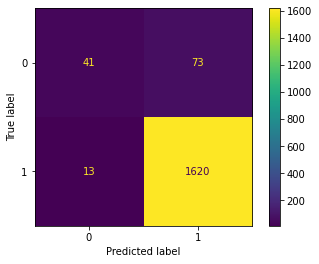

Accuracy Score: 0.9507727532913566


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)
y_pred1 = classifier1.predict(x_test)

cm1 = confusion_matrix(y_test,y_pred1)
print("Logistic Regression Classifier: ")
plot_confusion_matrix(classifier1, x_test, y_test)  
plt.show()
print("Accuracy Score:",accuracy_score(y_test,y_pred1))

### 2. K-NN Classifier

K-NN Classifier:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


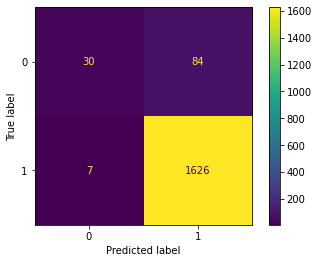

Accuracy Score: 0.9479107040641099


In [28]:
## 2] K-NN Classifier

from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors = 5,algorithm = 'auto', metric = 'manhattan', p = 1)
classifier2.fit(x_train,y_train)
y_pred2 = classifier2.predict(x_test)

cm2 = confusion_matrix(y_test,y_pred2)
print("K-NN Classifier:")
plot_confusion_matrix(classifier2, x_test, y_test)  
plt.show()
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

### 3. Kernel SVC 

Support Vector Classifier:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


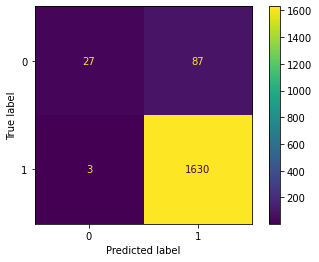

Accuracy Score: 0.9484831139095592


In [29]:
## 3] Kernel Support Vector Classifier 

from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf')
classifier3.fit(x_train,y_train)
y_pred3 = classifier3.predict(x_test)

cm3 = confusion_matrix(y_test,y_pred3)
print("Support Vector Classifier:")
plot_confusion_matrix(classifier3, x_test, y_test)  
plt.show()
print("Accuracy Score:",accuracy_score(y_test,y_pred3))


### 4. Gaussian Navie Bayes Classifier

Gaussian Navie Bayes Classifier 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


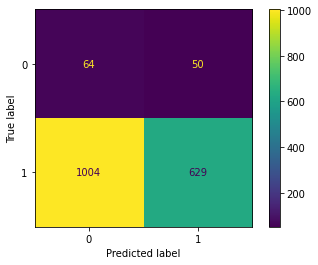


 Accuracy Score: 0.3966800228963938


In [30]:
## 4] Gaussian Navie Bayes Classifier 

from sklearn.naive_bayes import GaussianNB

classifier4 = GaussianNB()
classifier4.fit(x_train,y_train)
y_pred4 = classifier4.predict(x_test) 

cm4 = confusion_matrix(y_test,y_pred4)
print("Gaussian Navie Bayes Classifier \n")
plot_confusion_matrix(classifier4, x_test, y_test)  
plt.show()
print("\n Accuracy Score:",accuracy_score(y_test,y_pred4))

### 5. Decision Tree Classifier 

Decision Tree Classifier:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


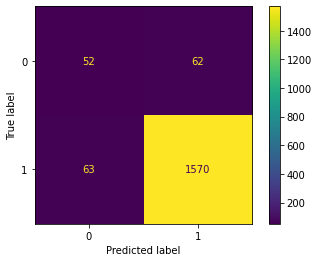

Accuracy Score: 0.9284487693188322


In [31]:
## 5] Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

classifier5 = DecisionTreeClassifier(criterion = 'entropy')
classifier5.fit(x_train,y_train)
y_pred5 = classifier5.predict(x_test) 

cm5 = confusion_matrix(y_test,y_pred5)
print("Decision Tree Classifier:")
plot_confusion_matrix(classifier5, x_test, y_test)  
plt.show()
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

### 6. Random Forest Classifier

Random Forest Classifier: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


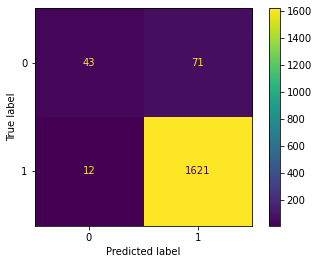

Accuracy Score: 0.9524899828277046


In [32]:
## 6] Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators = 500, random_state = 0)
classifier6.fit(x_train,y_train)
y_pred6 = classifier6.predict(x_test)

cm6 = confusion_matrix(y_test,y_pred6)
print("Random Forest Classifier: ")
plot_confusion_matrix(classifier6, x_test, y_test)  
plt.show()
print("Accuracy Score:",accuracy_score(y_test,y_pred6))


## ANN Classifier

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score

Layers = [Dense(units = 100, activation = 'relu', input_dim = len(x_train[0,:])),
          Dense(units = 50, activation = 'relu'),
          Dense(units = 10, activation = 'relu'),
          Dense(units = 1, activation = 'sigmoid')
          ]
model = Sequential(Layers)
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann = model.fit(x_train,y_train, batch_size = 100, epochs = 70)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               293100    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 298,671
Trainable params: 298,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
41/41 [==============================] - 3s 5ms/step - loss: 0.4309 - accuracy: 0.9298
Epoch 2/70
41/41 [==============================] - 0s 5ms/step - loss: 0.1811 - acc

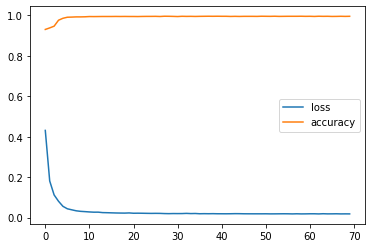

In [34]:
model_histroy = ann.history
pd.DataFrame(model_histroy).plot()
plt.show()

In [35]:
y_pred7 = model.predict(x_test) 
y_pred7 = (y_pred7 > 0.5)

cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
print(accuracy_score(y_test,y_pred7))

[[  49   65]
 [  22 1611]]
0.9502003434459073


## Accuracies of Different Models 

1. Logistic Regession - 95.07 %
2. K-NN Classifier - 94.8 %
3. Kernel SVC - 94.84 %
4. Naive Bayes Classifier - 40 %
5. Decision Tree Classifier - 92.8 %
6. Random Forest Classifier - 95.2 %
7. ANN ~ 95 %

- Since Random Forest Classifier has better Accuracy, we will be using it to predict whether a new review is positive or Negative

## Creating World Cloud

### Splitting the Reviews into Positive & Negative Subparts

In [36]:
positive_reviews = []
negative_reviews = []

for i in range(len(data)): 
    if data['New_Rating'][i] == 1:
      positive_reviews.append(data['New'][i])
    else :
      negative_reviews.append(data['New'][i])

In [37]:
positive_reviews

['wow superb camera phone smooth speed lag iphon king alway beauti product',
 'brand trustworthi got genuin pice low cost order green one trust colour amaz colour specif green purpl nice look thank flipkart',
 'awesom phone valu money happi batteri life awesom camera featur look imag snap use phone easi use fear get scratch back glass use cover help',
 'guy beast everi aspect configur full pack want like best camera best display best batteri whole day use everyon know process speed',
 'thank flipkart trust got devic perfect love best phone segment',
 'excel product worth everi penni write review use day earlier use iphon plus iphon faster anyth els excel pictur qualiti love',
 'first iphon ever bought earn money part time job colleg tech freak trust view bionic fastest effici reliabl processor till date camera focus quick take dslr qualiti photo screen size inch comfort screen size ole retina xdr display crisp everyth feel real stereo speaker clear even high volum',
 'delight phone pho

In [38]:
negative_reviews

['overal perform phone good expect appl major overh problem phone minor usag charg even authent w charger phone feel real hot even minor usag especi upper left side left side charg phone get hot not warm like liter hot plug charger minut avoid heat know problem devic general',
 'use oneplus pro year old devic still better batteri backup iphon rest know iphon great camera nice screen io smooth consist mani android phone lack face id pain covid boy give charger suck overal nice phone batteri better',
 'appl fan find iphon light easier use iphon compact size weight display littl better iphon speed also better satisfactori disappoint charger earphon box also price strategi appl product india posit much higher develop countri way round capac pay peopl develop nation like india much lower th',
 'overal good mobil apart call big brand noth special camera gud not wow like samsung ultra current use yes perform realli top class not see lag batteri could better',
 'flipkart support bad',
 'receiv

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
df = pd.DataFrame(data = positive_reviews, columns = ["Postive_Reviews"] )
df

,Postive_Reviews
0,wow superb camera phone smooth speed lag iphon...
1,brand trustworthi got genuin pice low cost ord...
2,awesom phone valu money happi batteri life awe...
3,guy beast everi aspect configur full pack want...
4,thank flipkart trust got devic perfect love be...
...,...
5449,one word great job appl
5450,receiv desir
5451,camera qualiti
5452,buy


### World Cloud for Positive Reviews

World Cloud for Positive Reviews :


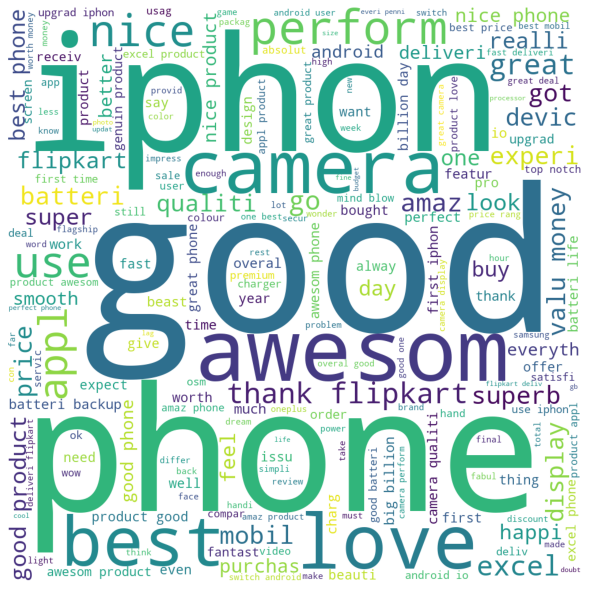

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
comment_words = ''

for val in df.Postive_Reviews:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
print("World Cloud for Positive Reviews :") 
    
plt.show()

In [42]:
df2 = pd.DataFrame(data = negative_reviews, columns = ["Negative_Reviews"] )
df2

,Negative_Reviews
0,overal perform phone good expect appl major ov...
1,use oneplus pro year old devic still better ba...
2,appl fan find iphon light easier use iphon com...
3,overal good mobil apart call big brand noth sp...
4,flipkart support bad
...,...
364,best usual
365,purchas flipkart play pubg devic heat up lag l...
366,got bad product
367,love


### World Cloud for Negative Reviews

World Cloud for Negative Reviews :


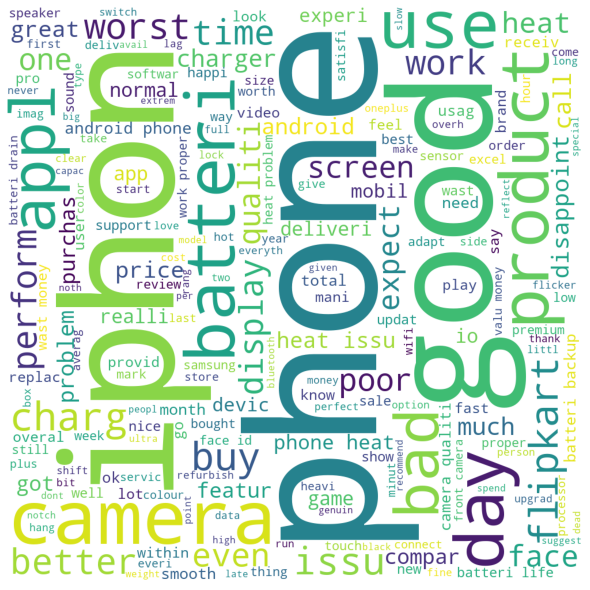

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
comment_words = ''

for val in df2.Negative_Reviews:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
print("World Cloud for Negative Reviews :")  

plt.show()

# For a new Review, Predicting whether its Positive or Negative

### Function to clean the text in new Review 

In [44]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def convert(new_review):
  review = re.sub('[^a-zA-Z]', ' ', new_review[0])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_words = stopwords.words('english')
  all_words.remove('not')
  review = [ snow_stemmer.stem(i) for i in review if not i in set(all_words) ]
  review = ' '.join(review)
  corpus.append(review)
  
  from sklearn.feature_extraction.text import CountVectorizer
  new_x_test = cv.transform(corpus).toarray()
  return new_x_test[-1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
new_review = input("Enter New Review: ")

if classifier6.predict([convert([new_review])]) == 1:
  print("Positve")
else :
  print("Negative")

Enter New Review: its bad
Negative


- Here are we are able to Predict whether a given review is positive or negative.

### Conclusion

- Just by entering the name of product, We are able to know its Major pro's & cons without actually going through all the reviews on Flipkart
- For any new review, We are also able to predict whether its Positive or Negative
- Both Customers & Company personels can get to know the product's sentiment without much hazzle 